# Gennie gevgen benchmark:
- incoming muon neturino
- target particle is O16
- Energy flux dist: E^-1
- Genie version manualy generated Cross sections
- Events: 2, 5, 10, 50, 100 -> 1e5

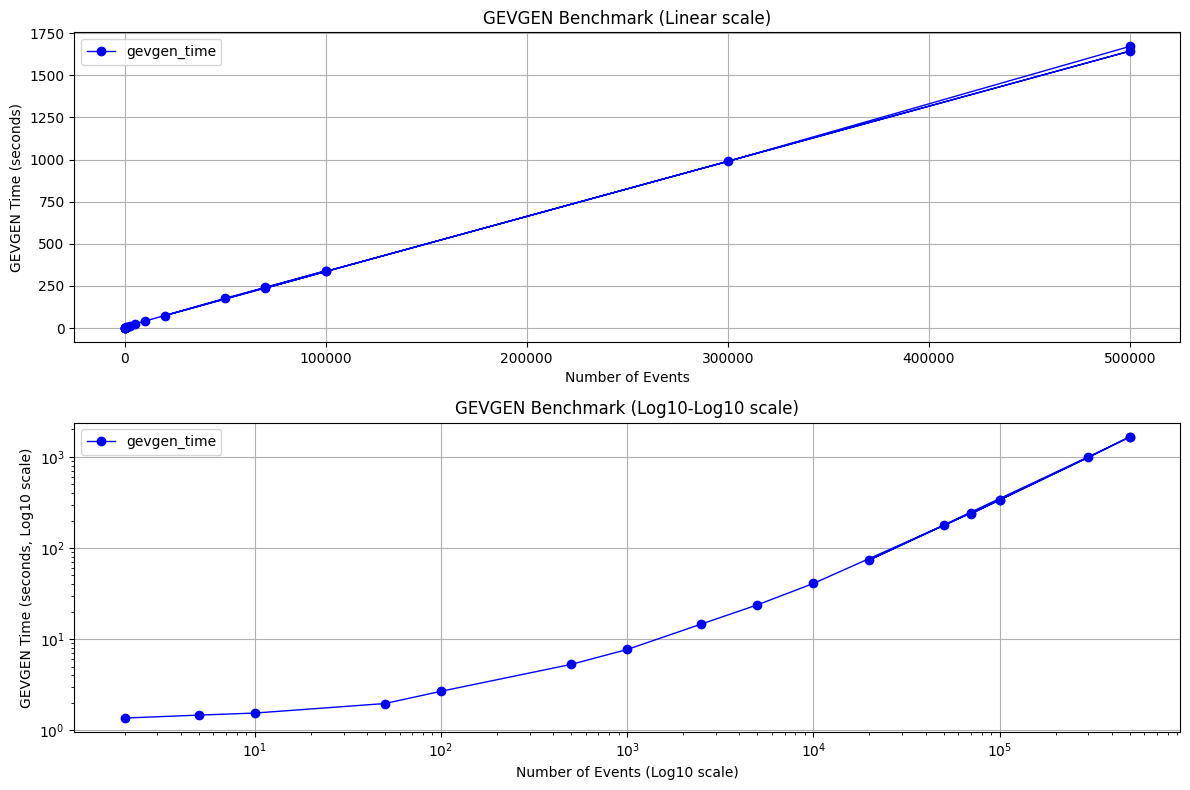

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/groups/icecube/jackp/prometheus/prometheus_clone/examples/GEVGEN_benchmark_results_20241003_154206.csv"

df = pd.read_csv(file_path)

plt.figure(figsize=(12, 8)) 
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(df['num_events'], df['gevgen_time'], label='gevgen_time', color='b', marker='o', lw = 1)

plt.xlabel('Number of Events')
plt.ylabel('GEVGEN Time (seconds)')
plt.title('GEVGEN Benchmark (Linear scale)')
plt.legend(loc='upper left')
plt.grid(True)

# Second subplot: Log-Log plot
plt.subplot(2, 1, 2) 
plt.plot(df['num_events'], df['gevgen_time'], label='gevgen_time', color='b', marker='o', lw = 1)

plt.xscale('log')  # Log scale for x-axis 
plt.yscale('log')  # Log scale for y-axis
plt.xlabel('Number of Events (Log10 scale)')
plt.ylabel('GEVGEN Time (seconds, Log10 scale)')
plt.title('GEVGEN Benchmark (Log10-Log10 scale)')
plt.legend(loc='upper left')
plt.grid(True)


plt.tight_layout()
plt.show()


## Prometheus with GENIE, CPU PPC:
- Energy Range 1-150 GeV
- Benchmarking by num events
- GENIE: Inocmining numu w/ O16
- Using PPC CPU
- Num Events: [2,5,10,50,100,500,1000,5000,10000,20000,50000]

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "/groups/icecube/jackp/prometheus/prometheus_clone/examples/SBATCH_1_150_benchmark_results_ppc_20241003_223226.csv"
cpu_file_path = file_path
# Load the CSV using pandas
df = pd.read_csv(file_path)

df.tail()

,num_events,genie_time,file_conversion_time,prometheus_time,total_time,sim,propagate_setup,propagate_main,propagate_cleanup,construct_output
7,2500,17.233720,0.347335,314.438937,332.021566,309.929119,0.033036,309.166794,0.007593,0.721650
8,5000,27.131053,0.668466,645.708668,673.509681,638.806300,0.030350,637.391525,0.007931,1.376450
9,10000,45.903143,1.314789,1367.004082,1414.223856,1355.210650,0.056251,1352.373568,0.008342,2.772440
10,20000,82.031859,2.622778,3219.074780,3303.731057,3197.475823,0.045386,3191.766781,0.013454,5.649840
11,50000,191.556385,6.445857,9995.601436,10193.605720,9945.362975,0.059189,9931.172613,0.013582,14.117164


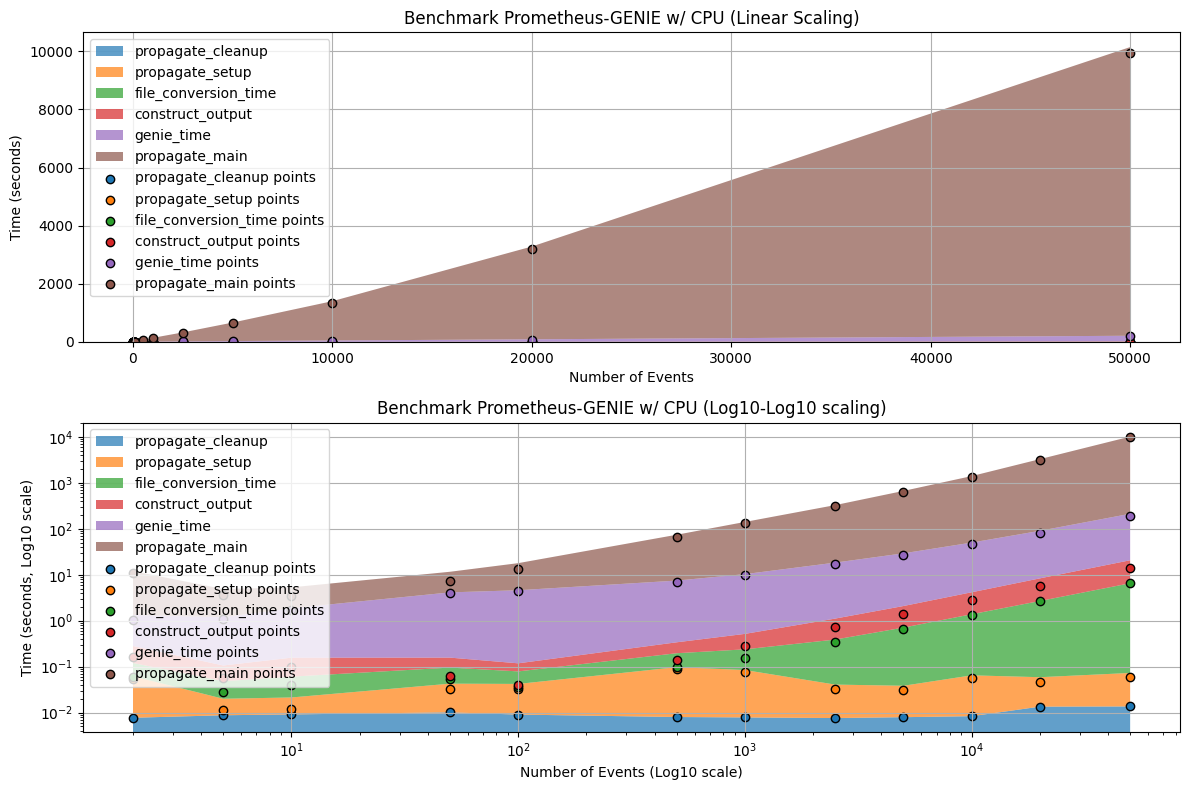

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the CSV using pandas
df = pd.read_csv(file_path)

# Select relevant columns for the benchmark plot
columns_to_plot = ['genie_time', 'file_conversion_time', 'propagate_setup', 
                   'propagate_main', 'propagate_cleanup', 'construct_output']

# Sort both the execution times and the labels for each row
sorted_times = []
sorted_labels = []

for _, row in df[columns_to_plot].iterrows():
    # Sort the values and their corresponding labels
    sorted_row = sorted(zip(row.values, columns_to_plot))
    sorted_times.append([val for val, _ in sorted_row])  # Sorted values
    sorted_labels.append([label for _, label in sorted_row])  # Corresponding sorted labels

# Convert the sorted values back into a DataFrame
df_sorted = pd.DataFrame(sorted_times, columns=columns_to_plot)

# Use the last sorted labels (they are the same for each row after sorting)
final_sorted_labels = sorted_labels[-1]

# Create a longer figure with two stacked subplots (non-log and log-log)
plt.figure(figsize=(12, 8))  # Adjust width and height for a longer figure

# First subplot: Non-logarithmic (linear) plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.stackplot(df['num_events'], df_sorted.T, labels=final_sorted_labels, alpha=0.7)

# Overlay scatter plot for the non-log plot
for i, col in enumerate(final_sorted_labels):
    plt.scatter(df['num_events'], df_sorted.iloc[:, i], edgecolor='black', label=f'{col} points')


plt.xlabel('Number of Events')
plt.ylabel('Time (seconds)')
plt.title('Benchmark Prometheus-GENIE w/ CPU (Linear Scaling)')
plt.legend(loc='upper left')
plt.grid(True)

# Second subplot: Log-Log plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.stackplot(df['num_events'], df_sorted.T, labels=final_sorted_labels, alpha=0.7)

# Overlay scatter plot for the log-log plot
for i, col in enumerate(final_sorted_labels):
    plt.scatter(df['num_events'], df_sorted.iloc[:, i], edgecolor='black', label=f'{col} points')


plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.xlabel('Number of Events (Log10 scale)')
plt.ylabel('Time (seconds, Log10 scale)')
plt.title('Benchmark Prometheus-GENIE w/ CPU (Log10-Log10 scaling)')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show() 


# Prometheus with GENIE, GPU PPC:

- Energy Range 1-150 GeV
- Benchmarking by num events
- GENIE: Inocmining numu w/ O16
- Using PPC CPU
- Num Events: [2,5,10,50,100,500,1000,2000] 
- Timout above 2000 events from SLURM

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "/groups/icecube/jackp/prometheus/prometheus_clone/examples/SBATCH_1_150_ROUND2_benchmark_results_ppc_cuda_20241003_152724.csv"
gpu_file_path = file_path
# Load the CSV using pandas
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to ensure it loaded correctly
df.tail()

,num_events,genie_time,file_conversion_time,prometheus_time,total_time,sim,propagate_setup,propagate_main,propagate_cleanup,construct_output
5,100,4.885649,0.041771,282.788743,287.718025,280.099066,0.120504,279.912665,0.013121,0.052698
6,200,5.913003,0.096746,541.298040,547.309846,538.449922,0.215202,538.149149,0.013317,0.072174
7,500,8.414594,0.103183,1365.929336,1374.448732,1362.798139,0.105469,1362.516326,0.012712,0.163559
8,1000,11.567022,0.180220,2692.563577,2704.313015,2689.021752,0.071165,2688.219679,0.012389,0.718436
9,2000,17.222384,0.833355,5553.537956,5571.595884,5549.071620,0.256389,5547.474016,0.020739,1.319694


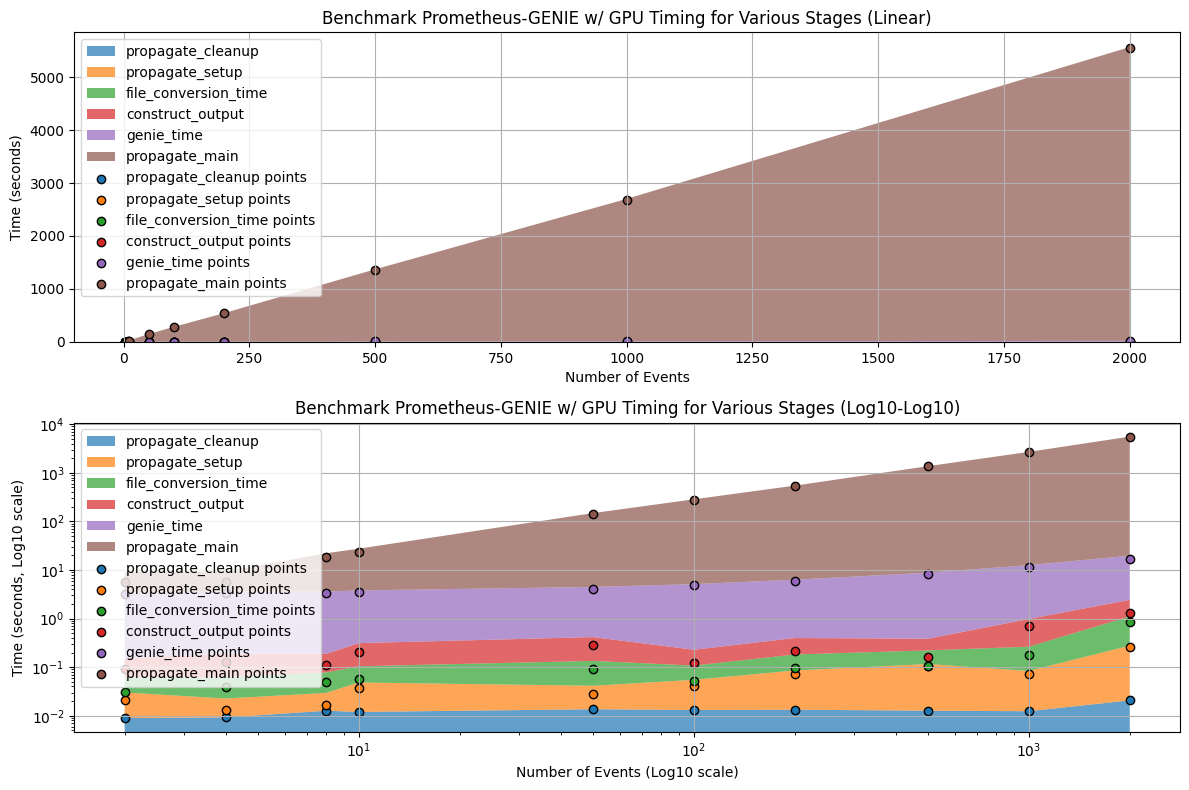

In [6]:

# Load the CSV using pandas
df = pd.read_csv(file_path)

# Select relevant columns for the benchmark plot
columns_to_plot = ['genie_time', 'file_conversion_time', 'propagate_setup', 
                   'propagate_main', 'propagate_cleanup', 'construct_output']

# Sort both the execution times and the labels for each row
sorted_times = []
sorted_labels = []

for _, row in df[columns_to_plot].iterrows():
    # Sort the values and their corresponding labels
    sorted_row = sorted(zip(row.values, columns_to_plot))
    sorted_times.append([val for val, _ in sorted_row])  # Sorted values
    sorted_labels.append([label for _, label in sorted_row])  # Corresponding sorted labels

# Convert the sorted values back into a DataFrame
df_sorted = pd.DataFrame(sorted_times, columns=columns_to_plot)

# Use the last sorted labels (they are the same for each row after sorting)
final_sorted_labels = sorted_labels[-1]

# Create a longer figure with two stacked subplots (non-log and log-log)
plt.figure(figsize=(12, 8))  # Adjust width and height for a longer figure

# First subplot: Non-logarithmic (linear) plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.stackplot(df['num_events'], df_sorted.T, labels=final_sorted_labels, alpha=0.7)

# Overlay scatter plot for the non-log plot
for i, col in enumerate(final_sorted_labels):
    plt.scatter(df['num_events'], df_sorted.iloc[:, i], edgecolor='black', label=f'{col} points')

plt.xlabel('Number of Events')
plt.ylabel('Time (seconds)')
plt.title('Benchmark Prometheus-GENIE w/ GPU Timing for Various Stages (Linear)')
plt.legend(loc='upper left')
plt.grid(True)

# Second subplot: Log-Log plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.stackplot(df['num_events'], df_sorted.T, labels=final_sorted_labels, alpha=0.7)

# Overlay scatter plot for the log-log plot
for i, col in enumerate(final_sorted_labels):
    plt.scatter(df['num_events'], df_sorted.iloc[:, i], edgecolor='black', label=f'{col} points')

plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.xlabel('Number of Events (Log10 scale)')
plt.ylabel('Time (seconds, Log10 scale)')
plt.title('Benchmark Prometheus-GENIE w/ GPU Timing for Various Stages (Log10-Log10)')
plt.legend(loc='upper left')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# comparing plots in same scale

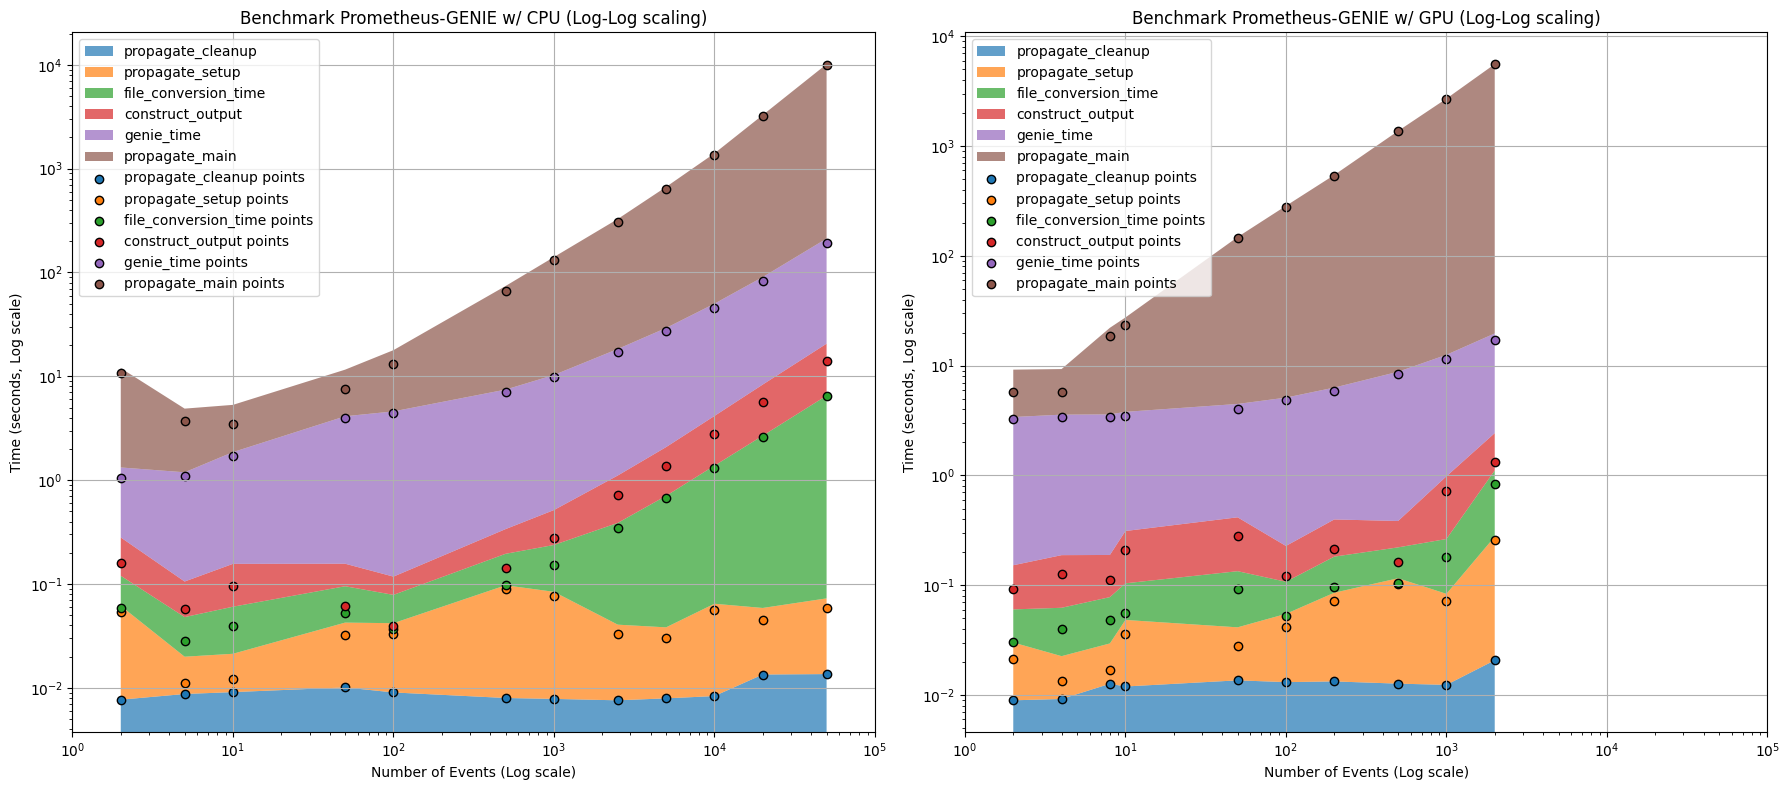

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the CSV data for CPU and GPU
df_cpu = pd.read_csv(cpu_file_path)
df_gpu = pd.read_csv(gpu_file_path)

# Select relevant columns for both CPU and GPU benchmarks
columns_to_plot = ['genie_time', 'file_conversion_time', 'propagate_setup', 
                   'propagate_main', 'propagate_cleanup', 'construct_output']

# Sort CPU data by execution time for each row
sorted_times_cpu = []
sorted_labels_cpu = []

for _, row in df_cpu[columns_to_plot].iterrows():
    sorted_row = sorted(zip(row.values, columns_to_plot))
    sorted_times_cpu.append([val for val, _ in sorted_row])
    sorted_labels_cpu.append([label for _, label in sorted_row])

df_sorted_cpu = pd.DataFrame(sorted_times_cpu, columns=columns_to_plot)
final_sorted_labels_cpu = sorted_labels_cpu[-1]

# Sort GPU data by execution time for each row
sorted_times_gpu = []
sorted_labels_gpu = []

for _, row in df_gpu[columns_to_plot].iterrows():
    sorted_row = sorted(zip(row.values, columns_to_plot))
    sorted_times_gpu.append([val for val, _ in sorted_row])
    sorted_labels_gpu.append([label for _, label in sorted_row])

df_sorted_gpu = pd.DataFrame(sorted_times_gpu, columns=columns_to_plot)
final_sorted_labels_gpu = sorted_labels_gpu[-1]

# Create a figure with two subplots side by side
plt.figure(figsize=(18, 8))

# X-axis limits for both plots (0 or 0.1 to 10^5)
x_limits = (1, 1e5)

# First subplot: CPU Benchmark (Linear and Log-Log)
plt.subplot(1, 2, 1)
plt.stackplot(df_cpu['num_events'], df_sorted_cpu.T, labels=final_sorted_labels_cpu, alpha=0.7)
for i, col in enumerate(final_sorted_labels_cpu):
    plt.scatter(df_cpu['num_events'], df_sorted_cpu.iloc[:, i], edgecolor='black', label=f'{col} points')

plt.xlim(x_limits)
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.xlabel('Number of Events (Log scale)')
plt.ylabel('Time (seconds, Log scale)')
plt.title('Benchmark Prometheus-GENIE w/ CPU (Log-Log scaling)')
plt.legend(loc='upper left')
plt.grid(True)

# Second subplot: GPU Benchmark (Linear and Log-Log)
plt.subplot(1, 2, 2)
plt.stackplot(df_gpu['num_events'], df_sorted_gpu.T, labels=final_sorted_labels_gpu, alpha=0.7)
for i, col in enumerate(final_sorted_labels_gpu):
    plt.scatter(df_gpu['num_events'], df_sorted_gpu.iloc[:, i], edgecolor='black', label=f'{col} points')

plt.xlim(x_limits)
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.xlabel('Number of Events (Log scale)')
plt.ylabel('Time (seconds, Log scale)')
plt.title('Benchmark Prometheus-GENIE w/ GPU (Log-Log scaling)')
plt.legend(loc='upper left')
plt.grid(True)

# Adjust layout and display the plots side by side
plt.tight_layout()
plt.show()


# Benchmarking Prometheus with LeptonInjector:
- Benchmarked on both Energy AND num Events
- Energy range was just 1 value per simulatuons
- Num Event benchmarks: 5, 10, 20, 50, 100, 200
- Energy Benchmarks: 1e2, 1e3, 1e4, 1e5, 1e6 (time out at 1e5, colored in black on heatmap)

First CPU

In [11]:
!pip install seaborn

In [12]:
# First Just CPU

In [20]:
import seaborn as sns



file_path = "/groups/icecube/jackp/prometheus/prometheus_clone/examples/TEST_NEW_benchmark_error2_results_energy_events_simset_925.csv"
cpu_file_path = file_path


# Load the CSV data
df = pd.read_csv(file_path)

df.tail()

,min_energy,max_energy,nevents,execution_time_sec,ram_usage_percent
14,10000.0,10000.0,20,873.881474,2.46
15,10000.0,10000.0,50,2277.103199,2.48
16,10000.0,10000.0,100,5232.288985,1.58
17,10000.0,10000.0,200,11740.400622,1.62
18,100000.0,100000.0,5,5971.861655,1.62


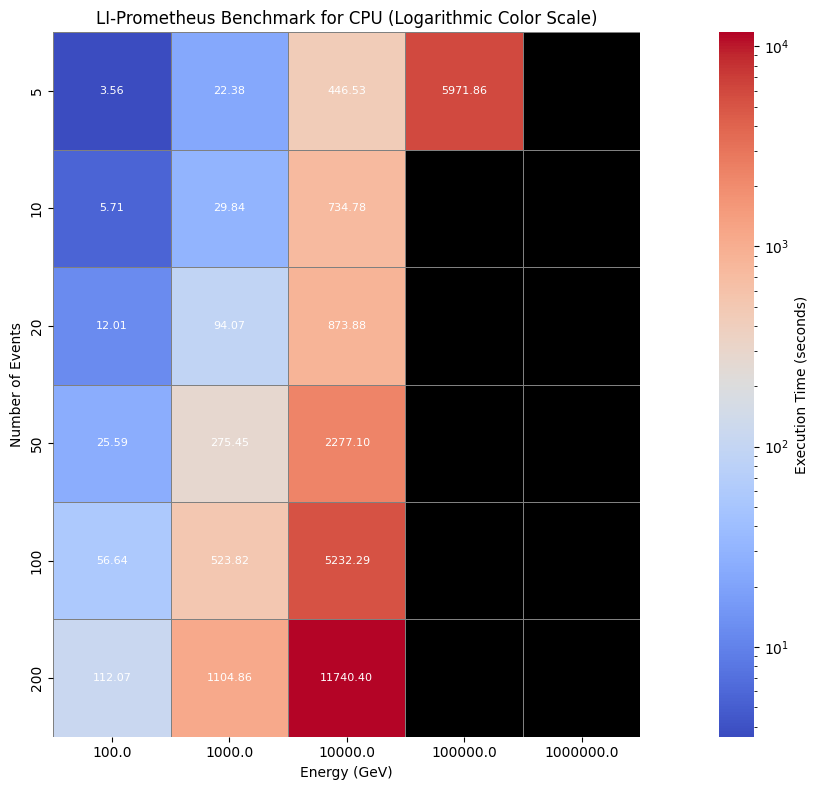

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm



# Pivot the data to create a 2D table for the heatmap
heatmap_data = df.pivot(index="nevents", columns="min_energy", values="execution_time_sec")

# Mark the entire 1e6 GeV (1000000 GeV) range as NaN, assuming 1e6 GeV corresponds to the column with min_energy = 1000000
heatmap_data[1000000.0] = np.nan

# Replace other missing values (if any) with NaN to handle them in the heatmap (assuming 0 is missing data)
heatmap_data = heatmap_data.replace(0, np.nan)

# Create a figure for the heatmap
plt.figure(figsize=(16, 8))

# Plot the heatmap with a logarithmic color scale
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", 
            norm=LogNorm(vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max()),  # Apply log color scaling
            cbar_kws={'label': 'Execution Time (seconds)'},
            mask=heatmap_data.isnull(),  # Mask the NaN cells
            annot_kws={"size": 8, "color": "white"},  # Annotate the available cells
            linewidths=0.5, linecolor='gray',  # Add gridlines
            square=True)

# Customize missing values to appear in black
plt.gca().set_facecolor('black')  # Set background color for missing cells

# Add labels and title
plt.xlabel('Energy (GeV)')
plt.ylabel('Number of Events')
plt.title('LI-Prometheus Benchmark for CPU (Logarithmic Color Scale)')

# Show the plot
plt.tight_layout()
plt.show()


# And finally for GPU:
we see in comparison to the CPU benchmark that 

In [25]:
import seaborn as sns
file_path = "/groups/icecube/jackp/prometheus/prometheus_clone/examples/GPU_2D_EXAMPLE_NEW_benchmark_results_energy_events_simset_925.csv"
gpu_file_path = file_path


# Load the CSV data
df = pd.read_csv(file_path)

df.tail()

,min_energy,max_energy,nevents,execution_time_sec,ram_usage_percent
25,1000000.0,1000000.0,10,100.493371,3.52
26,1000000.0,1000000.0,20,155.359528,3.51
27,1000000.0,1000000.0,50,507.828420,3.51
28,1000000.0,1000000.0,100,910.364940,3.51
29,1000000.0,1000000.0,200,1878.291186,3.52


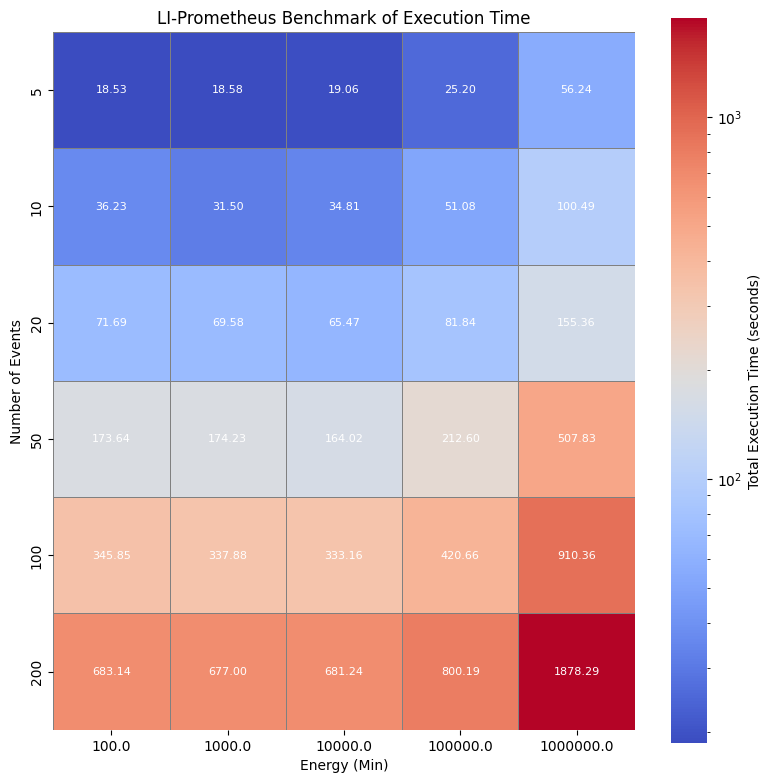

In [23]:
# Pivot the data to create a 2D table for the heatmap
heatmap_data = df.pivot(index="nevents", columns="min_energy", values="execution_time_sec")

# Create the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", 
            norm=LogNorm(vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max()),  # Apply log color scaling
            cbar_kws={'label': 'Total Execution Time (seconds)'},
            mask=heatmap_data.isnull(),  # Mask the NaN cells
            annot_kws={"size": 8, "color": "white"},  # Annotate the available cells
            linewidths=0.5, linecolor='gray',  # Add gridlines
            square=True)

# Add labels and title
plt.xlabel('Energy (Min)')
plt.ylabel('Number of Events')
plt.title('LI-Prometheus Benchmark of Execution Time')

# Show the plot
plt.tight_layout()
plt.show()


# And comparison:

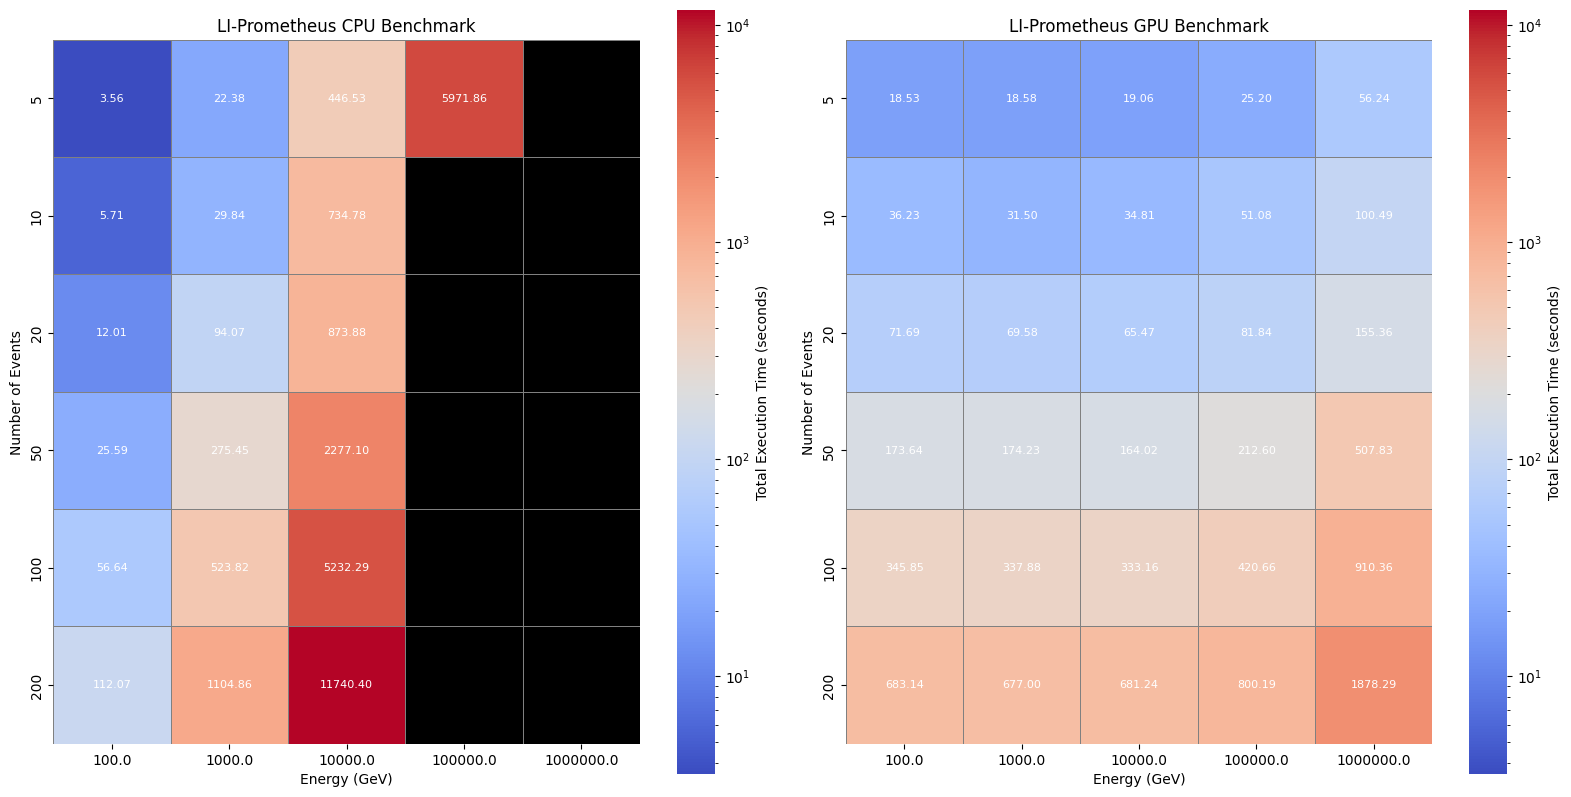

In [24]:

df_cpu = pd.read_csv(cpu_file_path)
df_gpu = pd.read_csv(gpu_file_path)

# Pivot the data for both CPU and GPU
cpu_heatmap_data = df_cpu.pivot(index="nevents", columns="min_energy", values="execution_time_sec")
gpu_heatmap_data = df_gpu.pivot(index="nevents", columns="min_energy", values="execution_time_sec")

# Mark the entire 1e6 GeV (1000000 GeV) range as NaN for both CPU and GPU
cpu_heatmap_data[1000000.0] = np.nan


# Replace other missing values with NaN
cpu_heatmap_data = cpu_heatmap_data.replace(0, np.nan)
gpu_heatmap_data = gpu_heatmap_data.replace(0, np.nan)

# Create a figure with two subplots (side by side)
plt.figure(figsize=(16, 8))

# Get the min and max values for consistent color scaling across both heatmaps
vmin = min(cpu_heatmap_data.min().min(), gpu_heatmap_data.min().min())
vmax = max(cpu_heatmap_data.max().max(), gpu_heatmap_data.max().max())

# CPU Heatmap
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(cpu_heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", 
            norm=LogNorm(vmin=vmin, vmax=vmax),  # Apply the same log color scaling
            cbar_kws={'label': 'Total Execution Time (seconds)'},
            mask=cpu_heatmap_data.isnull(),  # Mask the NaN cells
            annot_kws={"size": 8, "color": "white"},  # Annotate the available cells
            linewidths=0.5, linecolor='gray',  # Add gridlines
            square=True)
plt.gca().set_facecolor('black')  # Set background color for missing cells
plt.xlabel('Energy (GeV)')
plt.ylabel('Number of Events')
plt.title('LI-Prometheus CPU Benchmark')

# GPU Heatmap
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(gpu_heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", 
            norm=LogNorm(vmin=vmin, vmax=vmax),  # Apply the same log color scaling
            cbar_kws={'label': 'Total Execution Time (seconds)'},
            mask=gpu_heatmap_data.isnull(),  # Mask the NaN cells
            annot_kws={"size": 8, "color": "white"},  # Annotate the available cells
            linewidths=0.5, linecolor='gray',  # Add gridlines
            square=True)
plt.gca().set_facecolor('black')  # Set background color for missing cells
plt.xlabel('Energy (GeV)')
plt.ylabel('Number of Events')
plt.title('LI-Prometheus GPU Benchmark')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
